In [10]:
""" Get the 20 news groups data """
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import pickle

newsgroups_train = fetch_20newsgroups(shuffle=True, random_state=1, subset="train", 
                                      remove=("headers", "footers", "quotes"))

newsgroups_test = fetch_20newsgroups(shuffle=True, random_state=1, subset="test",
                                remove=("headers", "footers", "quotes"))

""" Prepare input for sklearn (counts) """
n_features = 3000
vectorizer = CountVectorizer(max_features=n_features, stop_words="english")

# Word counts per document matrix (input for sklearn)
W_train = vectorizer.fit_transform(newsgroups_train.data)
W_test = vectorizer.transform(newsgroups_test.data)

# Keep track of vocabulary to visualize top words of each topic
vocabulary = vectorizer.get_feature_names()

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

def visualizeTopics(model, id2word, n_top_words=12):
    for i, topic in enumerate(model.components_):
        print "Topic {}:".format(i+1)
        print " ".join([id2word[j] 
                        for j in topic.argsort()[:-n_top_words - 1:-1]])

        
topic_numbers = range(2, 30, 2)
train_perplexity = []
test_perplexity = []

for n_topics in topic_numbers:
    print n_topics
    lda = LatentDirichletAllocation(n_topics=n_topics, learning_method="batch")
    
    # Train on training set
    lda.fit(W_train)
    
    # Compute training and test perplexities
    train_perplexity.append(lda.perplexity(W_train))
    test_perplexity.append(lda.perplexity(W_test))


# Visualize learnt topics
# visualizeTopics(lda_sklearn, vocabulary)

2


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


4


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


6


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


8


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


10


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


12


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


14


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


16


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


18


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


20


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


22


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


24


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


26


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


28


/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


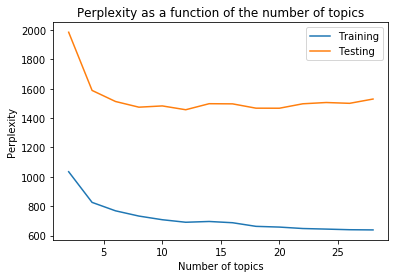

In [12]:
from matplotlib import pyplot as plt

plt.plot(topic_numbers, train_perplexity, label="Training")
plt.plot(topic_numbers, test_perplexity, label="Testing")
plt.title("Perplexity as a function of the number of topics")
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.legend()
plt.savefig("plots/perplexity_as_a_function_of_number_of_topics")
plt.show()

In [13]:
# Visualize learnt topics for the model with the best test set perplexity
lda = LatentDirichletAllocation(n_topics=12, learning_method="batch")
lda.fit(W_train)
visualizeTopics(lda, vocabulary)

/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 1:
space president mr nasa stephanopoulos program think earth launch going know time
Topic 2:
edu com available mail information ftp list send pub email data internet
Topic 3:
use windows file thanks does program using card problem know like window
Topic 4:
god people does think jesus don say believe know just way like
Topic 5:
10 00 25 15 11 20 16 12 17 14 13 24
Topic 6:
just don like good know think time ve people car really make
Topic 7:
key government encryption chip keys clipper law security use privacy secure public
Topic 8:
armenian people jews turkish armenians israel war israeli turkey world government jewish
Topic 9:
db drive 00 drives disk 02 cs hard san 01 03 si
Topic 10:
game team year said didn don games just know think time like
Topic 11:
gun use state control health file guns states law people crime medical
Topic 12:
ax max g9v b8f a86 pl 145 1d9 34u 1t 0t bhj
